# Artificial Intelligence Nanodegree
## Computer Vision Concentration project

Welcome to the Computer Vision project in the Artificial Intelligence Nanodegree!  

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Implementation TODOs in this notebook

In this project you will get to explore a few of the many computer vision algorithms/functionality built into the OpenCV library.  This expansive computer vision library is now [almost 20 years old](https://en.wikipedia.org/wiki/OpenCV#History) and still growing. 

The project itself is cut into self-contained chunks or TODOs.  Make sure to complete each section containing a TODO marker throughout the notebook.  For convinence we provide links to each of these sections below.

[TODO #1: Add eye detections to our face detection setup ](#TODO_1)

[TODO #2: De-noise an image for better face detection](#TODO_2)

[TODO #3: Blur and edge detect an image](#TODO_3)

[TODO #4: Hiding the identity of an unwilling participant automatically](#TODO_4)

[TODO #5: Specify the Network Architecture](#TODO_5)

[TODO #6: Compile and Train the Model](#TODO_6)

[TODO #7: Answer a few questions and visualize the Loss](#TODO_7)

[TODO #8: Facial Keypoints Detector: complete the pipeline](#TODO_8)

# 1.  Face detection using OpenCV

Have you ever wondered how Facebook tags an image, automatically determining who is in the picture?  Or how when taking a picture of someone with your smart phone the camera automatically finds and focuses in on the person's face (so you get a clear shot)?  Apps like these depend heavily on the machine learning task known as *face detection* -  which is the task of automatically finding faces in images containing people.  

At its root face detection is a classification problem - that is a problem of distinguishing between distinct classes of things.  With face detection these distinct classes are 1) images of human faces and 2) everything else.  

One older (from around 2001) but still popular scheme for performing the face detection task which we use here - built into OpenCV uses boosting-based classification scheme and is quite accurate.  You can find a [short description and walkthrough of OpenCV's implementation of this face detector here](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) and [the original paper proposing this approach here](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) - its a classic work.

A note to those interested in learning more about detection: detection problems are discussed at length in Alexis's course on Convolutional Networks in term 2 of AIND employing Keras, as well as in her final project.  So to dig deeper into detection approaches be sure to check out those resources!

## 1.1  Using OpenCV's built in classic face detector

In the next python cell we load in required libraries for this section of the project.

In [5]:
# import required libraries for this section
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # opencv library for computer vision / image processing - for more info visit http://opencv.org/
from PIL import Image
import time 

Next, we load in a test image we will run OpenCV's face detector on.

Note: by default OpenCV assumes the ordering of our image's color channels are Blue, then Green, then Red.  This is slightly out of order with most image types we'll use in these experiments, whose color channels are ordered Red, then Green, then Blue.  In order to switch the Blue and Red channels of our test image around we will use OpenCV's ```cvtColor``` function, which you can read more about by [checking out some of its documentation located here](http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html).  This is a general utility function that can do other transformations too like e.g., converting a color to grayscale image, and transforming a standard color image to HSV color space.

In [2]:
# load in color image for face detection
img = cv2.imread('images/test_image_1.jpg')

# switch red and blue color channels --> by default OpenCV assumes BLUE comes first, not RED as in many images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Lets take a look at our newly loaded image!

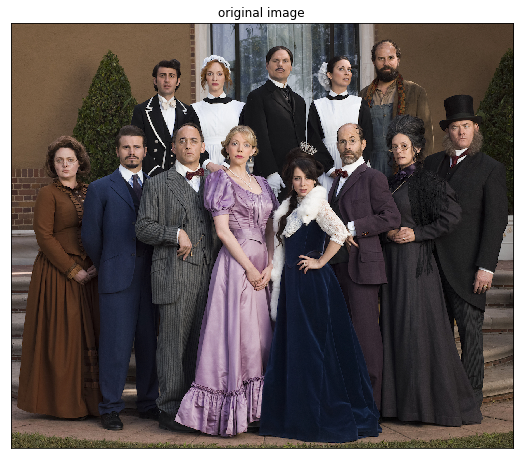

In [3]:
# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

All right.  There are a lot of people - and faces - in this picture.  13 faces to be exact.  Lets see if we can detect them using OpenCV's face detector.

To use this face detector, we will first convert the image from color to grayscale.  For face detection this is perfectly fine to do as there is plenty non-color specific structure in the human face for our detector to learn on.  Since we feed in only a single channel this makes things run faster.  

To make this switch from a color to grayscale image we again use the function ```cvtColor``` as follows.

In [4]:
# Many face detection algorithms (like OpenCV's) work very well on grayscale versions of an original color image, as there is plenty of structure in a human face for a detector to work properly.
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

Lets plot this image just to make sure we've done the transformation correctly.

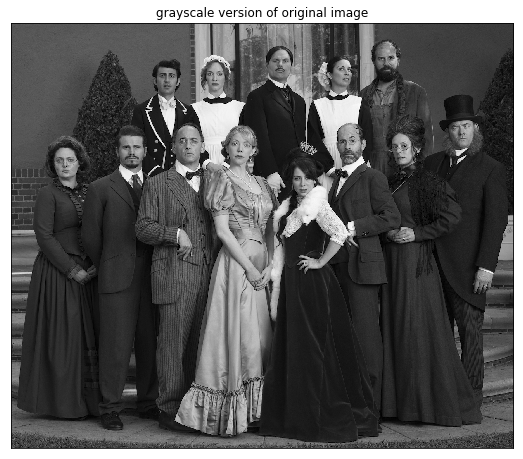

In [5]:
# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('grayscale version of original image')
ax1.imshow(grayscale_img,cmap = 'gray')

All right - looks good!  

Next we load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on our image to find faces!  This employs the OpenCV detector *CascadeClassifier*.

In [6]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector - the output here is an array of detections --> more specifically the corners of each detection box
faces = face_cascade.detectMultiScale(img, 4, 6)

To learn more about the parameters of this detector see [e.g., here](https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters) and [here](https://sites.google.com/site/5kk73gpu2012/assignment/viola-jones-face-detection#TOC-Image-Pyramid)

The output of *CascadeClassifier* here is an array of detections --> more specifically the opposite corners of each detection box.  Lets print out the detections!

In [7]:
# print out the detections found
print ('we found ' + str(len(faces)) + ' faces in this image')
print ("they're coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

we found 13 faces in this image
they're coordinates are as follows
[[ 588  390   96   96]
 [1157  391   96   96]
 [ 771  405   96   96]
 [ 383  414   96   96]
 [1345  411   96   96]
 [1295   94   96   96]
 [ 917  103   96   96]
 [1148  131   96   96]
 [ 146  458   96   96]
 [1565  339   96   96]
 [ 683  149   96   96]
 [ 510  158   96   96]
 [ 996  526   96   96]]


Just looking at these detections as numbers isn't too helpful.  Lets plot the corresponding detection boxes on our original image to see how well we've done.  

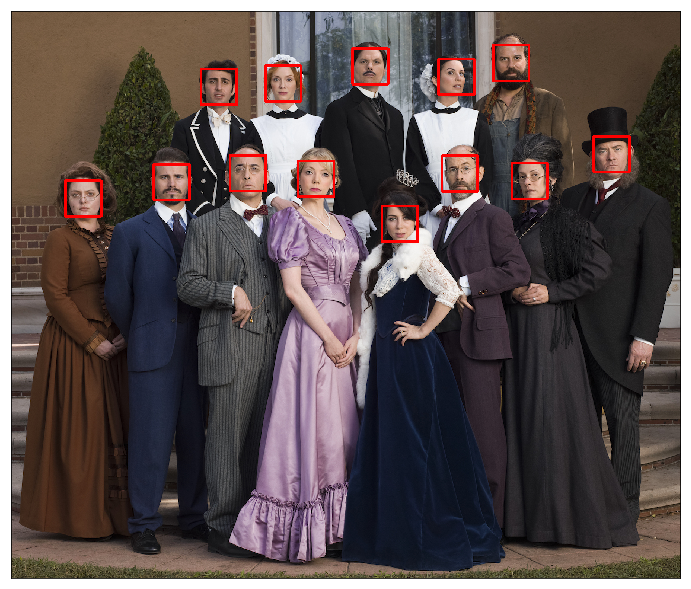

In [8]:
# loop over our detections and draw their corresponding boxes on top of our original image
img_with_detections = img.copy()    # make a copy of the original image to plot rectangle detections ontop of
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# plot out our image with detected faces drawn on top of them in red
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img_with_detections)

Not too shabby.  

<a id='TODO_1'></a>

## TODO #1: Add eye detections to our current setup!

There are other pre-trained detectors available with this particular detection algorithm - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here.](https://github.com/opencv/opencv/tree/master/data/haarcascades).  For your first exercise, add eye detections to our face detection setup.  

A Haar-cascade eye detector can be included in the same sort of way we have done so far with analogous face detection setup, and in this first task it will be your job to do just this.

First lets load up a new test image with just a single face.

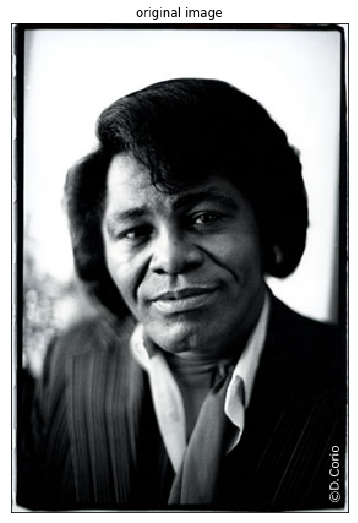

In [6]:
# load in color image for face detection
img = cv2.imread('images/james.jpg')

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

Notice here - the image is already grayscale.  So there's no need to transform it from color to grayscale as we did previously.

In the next Python cell we copy and paste the face detector setup described above.  First we load in the face cascade architecture, and then we run the detector over the image with a particular setting for both the detectors' parameters.

In [14]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector - the output here is an array of detections --> more specifically the corners of each detection box
faces = face_cascade.detectMultiScale(img, 1.25, 6)

We can see that we do indeed detect a face by printing out the coordinates of the variable 'faces'.

In [15]:
# print out the detected dimensions of detected faces
# print out the detections found
print ('we found ' + str(len(faces)) + ' faces in this image')
print ("they're coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

we found 1 faces in this image
they're coordinates and lengths/widths are as follows
[[ 55 107 151 151]]


Now its time to find eyes in this image by setting up a detector in the same way we did for faces -- only this time using the stored parameters of the eye cascade detector - called ```haarcascade_eye.xml``` located in the *detector_architectures* subdirectory.  In the next Python cell create your eye detector and store its detections.

**A few notes before you get started**: 

First, make sure to give your loaded eye detector the variable name

``eye_cascade``


and the list of eye regions you detect the variable name 

``eyes``

Second, since we have already run the face detector over this image you only should seek out eyes in the rectangular regions already detected in ``faces``.  This will also prevent potential false detections - that is incorrectly detected eyes that lie outside of any faces in the image.

Lastly, once you've run your eye detector over the facial detection you should print out the original image with both the face detection (in red) and your eye detections (in green) to check that everything worked correctly for this image.

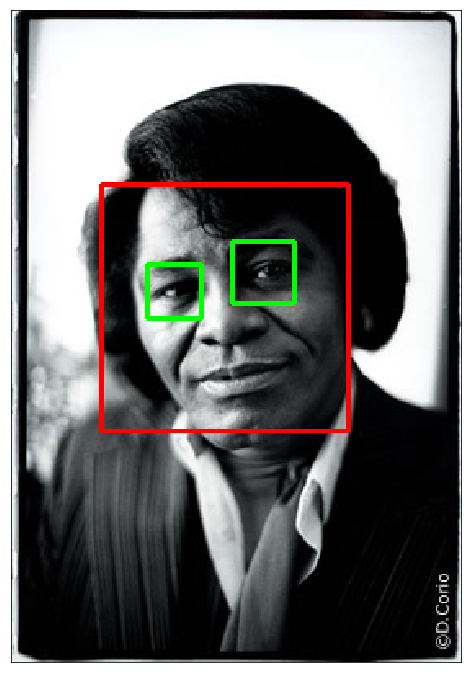

In [17]:
# load in the eye detector 
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# loop over our detections and draw their corresponding boxes on top of our original image
img_with_detections = img.copy()    # make a copy of the original image to plot rectangle detections ontop of

# loop over the detected faces, mark the image where each face is found, as well as eyes in each face
for (x,y,w,h) in faces:
    # mark the image with detected face
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    
    # detect eyes in this face
    roi = img_with_detections[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi)
    
    # mark the image with these eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
# plot out our image with detected faces drawn on top of them in red
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img_with_detections)

## (Optional) Add face and eye detection to your laptop camera

Its time to kick it up a notch, and add face and eye detection functionalities to your laptop's camera!  Afterwards you'll be able to show off your creation as in the gif shown below - made with a completed version of the code wrapper given below!  

<img src="images/laptop_face_detector_example.gif" width=400 height=300/>

Notice that not all of the detections here are perfect - and your result need not be perfect either.   You should a small amount of time tuning the parameters of your detectors to get reasonable results, but don't hold out for perfection.  If we wanted perfection we'd need to spend a ton of time tuning the parameters of each detector, cleaning up the input image frames, etc., - think of this as more of a rapid prototype. 

The next cell contains code a wrapper function called ``laptop_camera_face_eye_detector`` that - when called  - will activate your laptop's camera.  You will place the relevant face and eye detection code developed above in this function in order for face/eye detection to be performed and marked on each frame your camera captures.

Before adding anything to the function you can call it to get a hang of how it works - a small window will pop up showing you the live feed from your camera, you can press any key to close this window.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [1]:
### add face and eye detection to this laptop camera function --> make sure to draw out all faces/eyes found in each frame on the shown video feed
# function wrapper for face/eye detection with your laptop camera
import cv2
import time 
def laptop_camera_go():
    # import required architectures for face and eye detection
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

    # create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # keep video stream open
    while rval:
        # resize image from camera --> if things are running slow for you try making the image smaller by dividing width and height by a number greater than 2
        height, width = frame.shape[:2]
        frame = cv2.resize(frame, (round(width/2), round(height/2)), interpolation = cv2.INTER_AREA)

        ### face detection code goes here ###
        # get grayscale version of image for processing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # process frame to show face and eyes
        faces = face_cascade.detectMultiScale(gray, 2, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

        # plot image from camera with detections marked
        cv2.imshow("face detection activated", frame)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # destroy window 
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [2]:
# call the laptop camera face/eye detector function above
laptop_camera_go()

## 1.3  Image denoising using OpenCV

Image quality is always an important issue when working on computer vision problems like face detection, and general object detection as well.  Typically when creating a set of images to train on significant care is taken to ensure that training images are clear of visual noise or artifacts.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This sort of cleaning - referred to as *pre-processing* - can include a number of cleaning phases like de-blurring, de-noising, color adjustment, etc., and many of these tasks can be accomplished using OpenCV.

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

In the next cell we create an artifcal noisy version of the previous image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

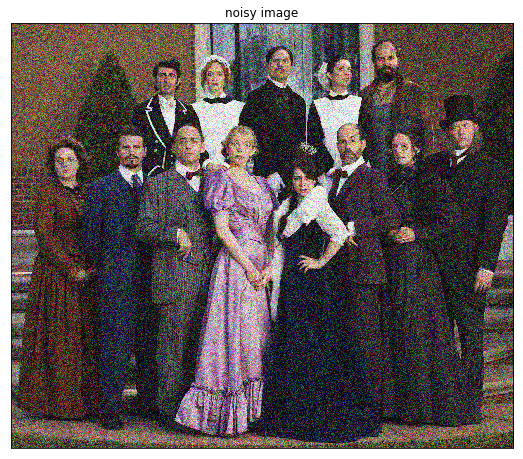

In [36]:
# create a copy of our original image to add some noise too
img_with_noise = img.copy()    # make a copy of the original image to add noise too
img_with_noise = np.asarray(img_with_noise)

# create a noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(img.shape[0],img.shape[1],img.shape[2])*noise_level

# Add this noise to the image
img_with_noise = img_with_noise + noise

# Convert back to uint8 format
img_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in img_with_noise])

# plot our noisy image!
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.imshow(img_with_noise)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('noisy image')
plt.show()

In the context of face detection, the problem with an image like this is that  - due to the noise - we may either miss some faces or get false detections.  

In the next cell we apply the same trained OpenCV detector with the same settings as before, to see what sort of detections we get.

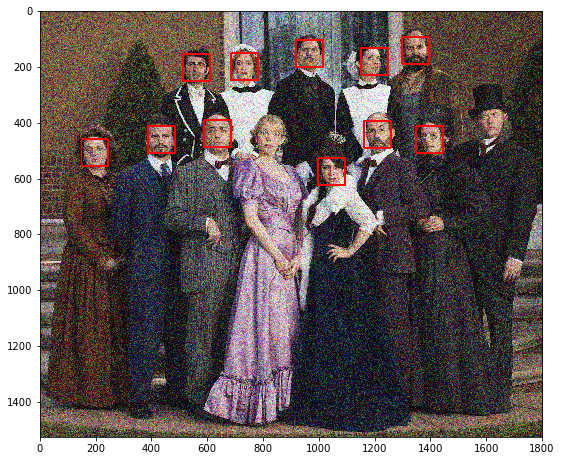

In [37]:
# loop over our detections and draw their corresponding boxes on top of our original image
img_with_detections = img_with_noise.copy()    # make a copy of the original image to plot rectangle detections ontop of

# Many face detection algorithms (like OpenCV's) work very well on grayscale versions of an original color image, as there is plenty of structure in a human face for a detector to work properly.
grayscale_img = cv2.cvtColor(img_with_noise, cv2.COLOR_BGR2GRAY) 

# detect faces in grayscale images
faces = face_cascade.detectMultiScale(grayscale_img, 2, 6)

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# plot out our image with detected faces drawn on top of them in red
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.imshow(img_with_detections)

Arg!  With this added noise we now miss one of the faces!

<a id='TODO_2'></a>

## TODO #2: Use OpenCV's de-noising functionality and clean up this noisy image so that all faces are properly detected

Time to get your hands dirty: using OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` - de-noise this image enough so that all faces in the image are properly detected.  Once you have cleaned the image in the next cell, use the cell that follows to run our trained face detector over the cleaned image to check out its detections.

You can find its official [official documentation here]([documentation for denoising](http://docs.opencv.org/trunk/d1/d79/group__photo__denoise.html#ga21abc1c8b0e15f78cd3eff672cb6c476) and [a useful example of its use here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html).


**Note:** you can keep all parameters *except* `photo_render` fixed as shown in the second link above.  Play around with the value of this parameter - see how it effects the resulting cleaned image.

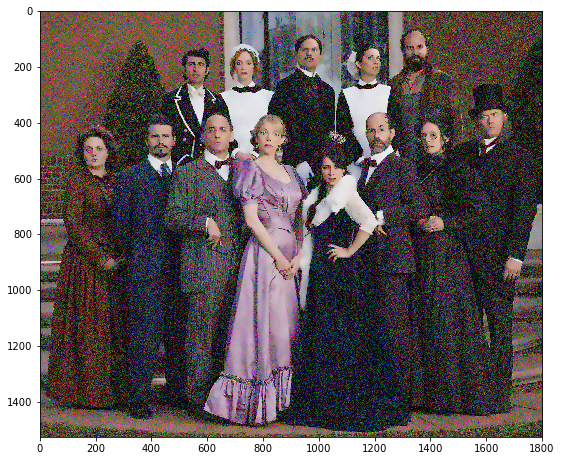

In [38]:
## TODO: Use OpenCV's built in color image de-noising function to clean up our noisy image!
# denoise image
img_to_denoise = img_with_noise.copy()    # make a copy of the original image to plot rectangle detections ontop of

# denoise image
img_to_denoise = cv2.fastNlMeansDenoisingColored(img_to_denoise,None,15,10,7,21)
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.imshow(img_to_denoise)

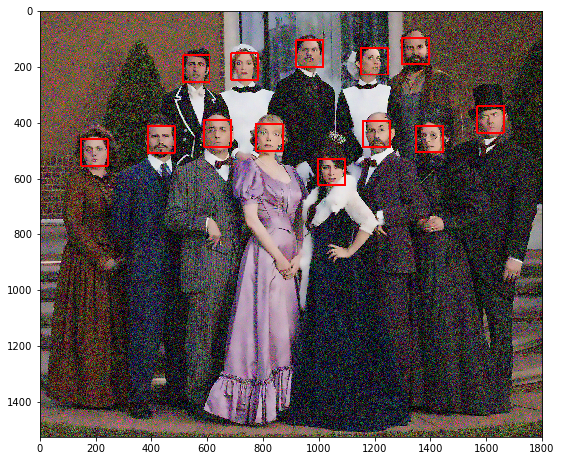

In [40]:
# loop over our detections and draw their corresponding boxes on top of our original image
img_with_detections = img_to_denoise.copy()    # make a copy of the original image to plot rectangle detections ontop of

# Many face detection algorithms (like OpenCV's) work very well on grayscale versions of an original color image, as there is plenty of structure in a human face for a detector to work properly.
grayscale_img = cv2.cvtColor(img_to_denoise, cv2.COLOR_BGR2GRAY) 

# detect faces
faces = face_cascade.detectMultiScale(grayscale_img, 2, 6)

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# plot out our image with detected faces drawn on top of them in red
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.imshow(img_with_detections)

## 2.  What can we do with our detected faces?   Exploring OpenCV functionality.

Now that we have developed a simple pipeline for detecting faces using OpenCV - lets start playing around with a few fun things we can do with all those detected faces!

##  2.1:  Blurry vision 

For many people blurry vision is an unfortunate fact of life that is actively avoided by wearing prescription glasses or contact lenses.  But in image processing and computer vision, blurry vision is actually something to be desired at times!  This is because - as illustrated in the image below taken from [Wikipedia](https://en.wikipedia.org/wiki/Gaussian_blur) - blurring an image helps remove local structure in an image while highlighting global structures which are much more useful for computer vision tasks.  

<img src="images/wiki_blur.png" width=400 height=300/>

Technically speaking, blurring is usually a **convolution operation** performed on the image itself - [see this video in Alexis's CNN course discussing convolutions to learn more about this concept](
https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/53b2a19e-4e29-4ae7-aaf2-33d195dbdeba/lessons/2df3b94c-4f09-476a-8397-e8841b147f84/concepts/a74cd79d-bc91-4712-8a63-35805a023a84) - and there are many different ways one can blur an image (see e.g., [OpenCV's documentation on image smoothing to see just how many ways this can be done!](http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html)).

Here we briefly discuss a few simple examples where blurring an image can be quite helpful.

# Example: image Downsampling

Perhaps the simplest example of where actually blurring an image can be helpful is when shwrinking or *downsampling* a large image into a smaller one.  The image below - [taken from this presentation](https://courses.cs.washington.edu/courses/cse455/09wi/Lects/lect3.pdf) - shows three panels, and the effect of downsampling a large image by 1/2 and 1/4.   

<img src="images/downsample_0.png" width=400 height=300/>

When we downsample an image, we essentially throw away a bunch of its pixels to make it smaller.  For example, to downsample an image by 1/2 - shrinking each dimension of the image by 1/2 -  we just keep every other pixel, throwing the rest out.  

Lets take a closer look at each of three pictures in in the above image.  Below each picture is shown at the same size so we can compare and contrast.  How much information do we lose?

<img src="images/downsample_blur.png" width=400 height=300/>

The image downsampled by 1/2 looks quite good - we can still see the image is that of a man.  The image downsampled by 1/4 has lost a lot of its information, but we can still distinguish the subject of the painting fairly clearly.  So in both pictures the major structures of the image are pretty clearly visible.

However there's one catch here - before downsampling the original image it was *blurred* slightly - because doing this helps retain the major structures of the image.  Blurring the image erases local structures, but helps keep the global structures alive and well.

What if we don't do this, and just downsample the raw image?  Lets compare the original image to ones downsampled by 1/2 and 1/4 respectively.

<img src="images/downsample_pixelated.png" width=400 height=300/>

Again here the  middle image is downsampled by 1/2 the original by keeping every other pixel in the original, and likewise with the image on the right has been downsampled by 1/4.

As the image is downsampled to 1/2 its original size, you can see that things tend to get quite 'boxy' - or pixelated - because so much of the original image has been thus far thrown away.  This is very clearly evident in the 1/4 downsampled image.  Not as much of the important global structures of the image are retained here -- blurring the image first is what helps us do this.

# Example: Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.

Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information.  And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative).  So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that.  

Below is an animated gif showing the result of an edge-detected cat [taken from Wikipedia](https://en.wikipedia.org/wiki/Gaussian_blur#Common_uses), where the image is gradually blurred more and more prior to edge detection.  When the animation begins you can't quite make out what its a picture of, but as the animation evolves and local structures are removed via blurring the cat becomes visible in the edge-detected image.

<img src="images/Edge_Image.gif" width=400 height=300/>

Technically speaking, edge detection is naturally a **convolution operation** performed on the image itself - [see this video in Alexis's CNN course discussing convolutions to learn more about this concept](
https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/53b2a19e-4e29-4ae7-aaf2-33d195dbdeba/lessons/2df3b94c-4f09-476a-8397-e8841b147f84/concepts/a74cd79d-bc91-4712-8a63-35805a023a84) - and you can see e.g., [this OpenCV documentation page to learn more about edge detection](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html).

<a id='TODO_3'></a>

## TODO #3: Use OpenCV's ```filter2d``` function to blur an image, then edge detect it!

In the cell below we load in a test image, then apply one of [OpenCV's popular edge detector](http://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html) on it.  The original image is shown in the right panel of the figure, while the edge-detected version of the image is shown in the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications edge detection should preserve *global* structure only, doing away with local structures that don't help describe (in a big picture sense) what is in the image.

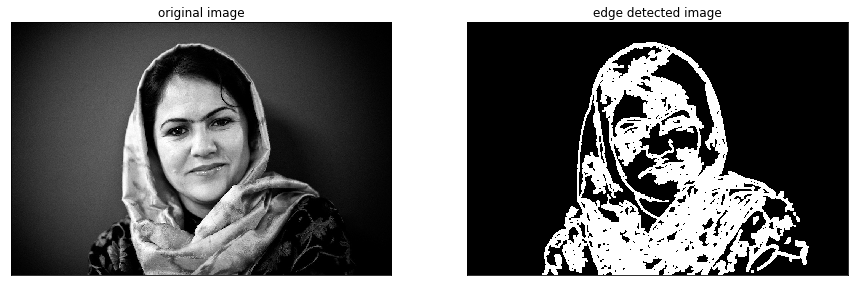

In [2]:
# load in the image
img = cv2.imread('images/fawzia.jpg')

# switch red and blue color channels --> by default OpenCV assumes BLUE comes first, not RED as in many images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to grayscale
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

# edge detect
edge_detected_img = cv2.Canny(grayscale_img,0,255)

# dialate the image a little to show off edges
kernel = np.ones((5,5))
edge_detected_img = cv2.dilate(edge_detected_img,kernel,iterations = 1)

# plot original and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('edge detected image')
ax2.imshow(edge_detected_img,cmap='gray')

Without removing local structure in the image - by blurring it! - a lot of unimportant edge content gets picked up by the detector, as shown in the right panel above. 

In the next cell you will repeat this experiment - only blurring the image first to remove this unimportant local structure, so that only the important big picture details remain in the edge-detected image.

Blur the image by using OpenCV's ```filter2d``` functionality - which is discussed in e.g., [this documentation page](http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) - using an *averaging kernel* of width equal to 4.

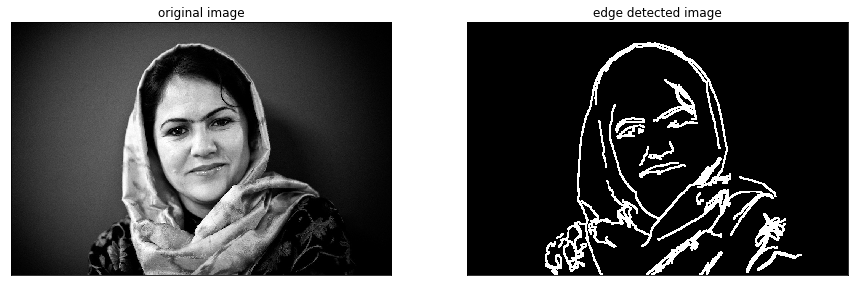

In [5]:
### TODO: blur our image before edge detection using OpenCV's filter2d functionality, the averging kernel, and a kernel width equal to 4
# convert image to grayscale
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

# create average blur kernel
kernel_width = 4
kernel = np.ones((kernel_width,kernel_width))/float(kernel_width**2)
grayscale_img = cv2.filter2D(grayscale_img,-1,kernel)

# use Canny edge detector
edge_detected_img = cv2.Canny(grayscale_img,0,255)

# dialate the image a little to show off edges
kernel = np.ones((5,5))
edge_detected_img = cv2.dilate(edge_detected_img,kernel,iterations = 1)

# plot original and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('edge detected image')
ax2.imshow(edge_detected_img,cmap='gray')

# Example: Hiding the identity of unwilling participants

If you film something like a documentary or reality TV you must get permission from evey individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)!  This is true as well for projects like [Google's StreetView maps](https://www.google.com/streetview/) - an enormous collection of mapping images taken from a fleet of Google vehicles.  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces.  Here's a few examples of folks caught in the camera of a Google street view vehicle.

<img src="images/streetview_example_1.jpg" width=400 height=300/>
<img src="images/streetview_example_2.jpg" width=400 height=300/>

Of course due to the sheer scale of pictures taken here, this face blurring must be done automatically - necessitating the use of face detection.  The idea here is to first detect any faces in an image, and then blur them out!

<a id='TODO_4'></a>

## TODO #4: Use your blurring functionality to hide the identity of an unwilling participant

Lets try this out for ourselves.  Use the face detection pipeline built above and the blurring function you built in the previous TODO item in order to hide the identity of the person in the following image - loaded in and printed in the next cell.  

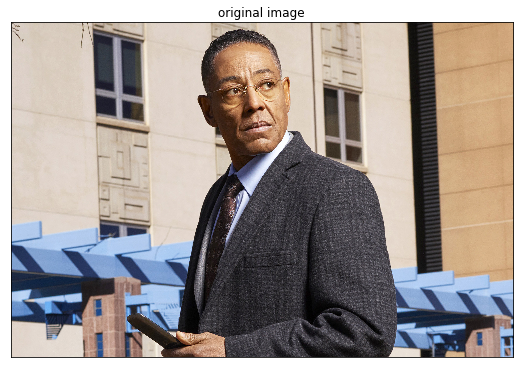

In [22]:
# load in the image
img = cv2.imread('images/gus.jpg')

# switch red and blue color channels --> by default OpenCV assumes BLUE comes first, not RED as in many images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

Remember -- the idea here is to 1) automatically detect the face in this image, and then 2) blur it out!  Make sure to adjust the parameters of the blurring functionality to completely obscure this person's identity!

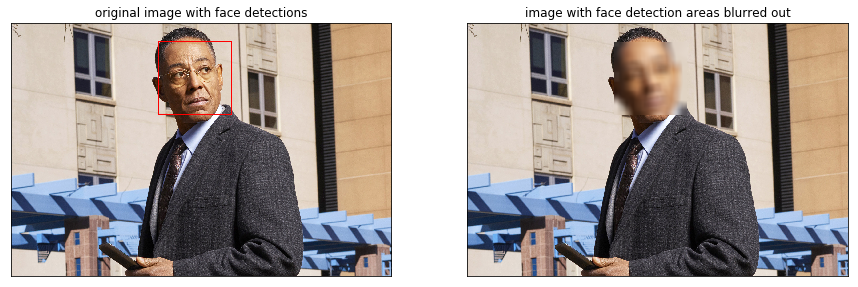

In [23]:
### TODO: automatically find and hide this person's identity!
# Many face detection algorithms (like OpenCV's) work very well on grayscale versions of an original color image, as there is plenty of structure in a human face for a detector to work properly.
img2 = img.copy()
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector - the output here is an array of detections --> more specifically the corners of each detection box
faces = face_cascade.detectMultiScale(img, 4, 6)
kernel_width = 50
for (x,y,w,h) in faces:    
    # get face detected area in color and grayscale image
    roi_gray = grayscale_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # build your kernel for blurring and convolve with the detected face pixels
    kernel = np.ones((kernel_width,kernel_width))/float(kernel_width**2)
    blur = cv2.filter2D(roi_color,-1,kernel)
    
    # replace color image with blurred version
    img2[y:y+h, x:x+w] = blur
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)

# plot out our image with detected faces drawn on top of them in red
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image with face detections')
ax1.imshow(img)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('image with face detection areas blurred out')
ax2.imshow(img2)

## (Optional) Build identity protection into your laptop camera

In this optional task you can add identity protection to your laptop camera, using the previously completed tasks number 2 - where you added face detection to your laptop camera - and the task above.  You should be able to get reasonable results with little parameter tuning - like the one shown in the gif below.

<img src="images/laptop_blurer_example.gif" width=400 height=300/>

As with the previous video task, to make this perfect would require significant effort - so don't strive for perfection here, strive for reasonable quality.  

The next cell contains code a wrapper function called ``laptop_camera_identity_hider`` that - when called  - will activate your laptop's camera.  You need to place the relevant face detection and blurring code developed above in this function in order to blur faces entering your laptop camera's field of view.

Before adding anything to the function you can call it to get a hang of how it works - a small window will pop up showing you the live feed from your camera, you can press any key to close this window.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [33]:
### insert face detection and blurring code into the wrapper below to create an identity protector on your laptop!
def laptop_camera_go():
    # import required cascades
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # keep video stream open
    while rval:
        # resize image from camera --> if things are running slow for you try making the image smaller by dividing width and height by a number greater than 2
        height, width = frame.shape[:2]
        frame = cv2.resize(frame, (round(width/2), round(height/2)), interpolation = cv2.INTER_AREA)
        
        ### face detection code goes here ###
        # get grayscale version of image for processing
        grayscale_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # process frame to show face and eyes
        faces = face_cascade.detectMultiScale(grayscale_img, 1.1, 5)
        for (x,y,w,h) in faces:
            roi_gray = grayscale_img[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            blur = cv2.blur(roi_color,(50,50))
            frame[y:y+h, x:x+w] = blur
            
        # plot image from camera with detections marked
        cv2.imshow("face detection activated", frame)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # destroy window 
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [ ]:
# run laptop identity hider
laptop_camera_go()

# 3.  What can we do with our detected faces?    Using convolutional networks + OpenCV

OpenCV is often used in practice with other machine learning and deep learning libraries to produce interesting results.  In this stage of the project you will create your own end-to-end pipeline - employing convolutional networks and keras along with OpenCV - to apply a selfie filter to streaming video.  

You will start by creating and then training a convolutional network that can detect facial keypoints in a small dataset of cropped images of human faces.  We then guide you towards OpenCV to expanding your detection algorithm to more general images.  What are facial keypoints?  Lets take a look at some examples.

<img src="images/keypoints_test_results.png" width=400 height=300/>

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.,  Facial keypoints can be used in a variety of machine learning applications - e.g., in face and emotion recognition - or in commercial applications the image filters popularized by Snapchat.

For example, below we illustrate such a toy filter using the result of this section - a filter to automatically put sunglasses on people in images (using the facial keypoints to place the glasses correctly on each face).  Here the facial keypoints have been colored lime green for visualization purposes.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

##  3.1  How do we make a facial keypoint detector?

But first things first: how can we make a facial keypoint detector?  Well, at a high level notice that facial keypoint detection is a *regression problem*.  A face (an input point) corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because our input points are images - we can in particular employ a convolutional network to leverage the structure of our input images to learn this relationship in an efficient manner (you can see Alex's course on convolutional networks in AIND term 2 if this concept is unfamiliar to you).

In order to train such a convolutional regressor we need a training set - a set of facial image / facial keypoint pairs to train on.  For this we will be using [this dataset (make sure you download both the training and testing sets)](https://www.kaggle.com/c/facial-keypoints-detection/data) from Kaggle containing several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, reported in $(x, y)$ coordinates.  This wonderful resource also have a substantial testing set, which we will use to in tinkering with our convolutional network.

Activate the next Python cell below to load in this data - notice we will load in both  training and testing sets.

In [4]:
from utils import *

# load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


The `load_data` function in `utils.py` originates from this excellent [blog post](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), which you are *strongly* encouraged to read.  Please take the time now to review this function.  Note how the output values - that is, the coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$.  

Note: the original Kaggle dataset contains some images with several missing keypoints.  For simplicity, the `load_data` function removes those images with missing labels from the dataset.  As an __*optional*__ extension, you are welcome to amend the `load_data` function to include the incomplete data points. 

### Visualize the Training Data

Execute the code cell below to visualize a subset of the training data.

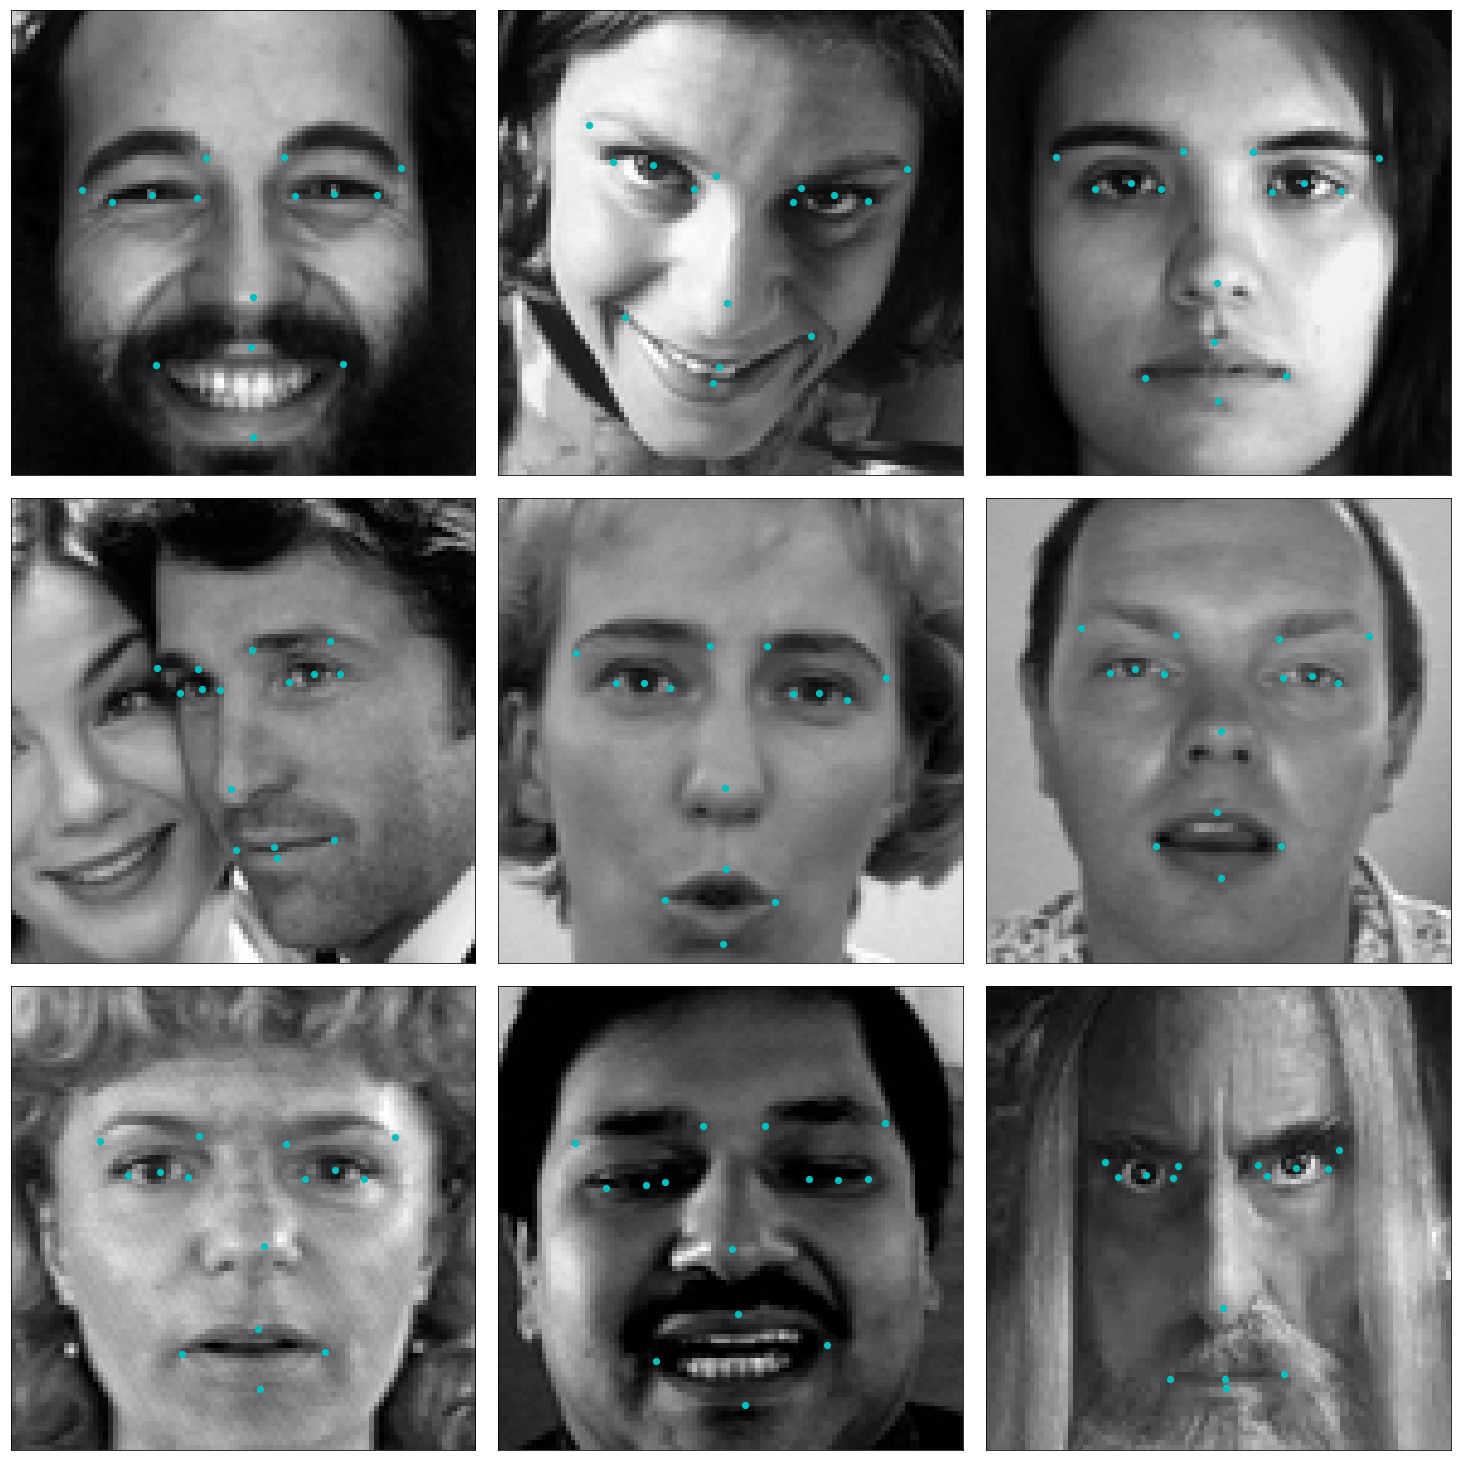

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.  

Review the `plot_data` function in `utils.py` to understand how the 30-dimensional training labels in `y_train` are mapped to facial locations, as this function will prove useful for your pipeline.

<a id='TODO_5'></a>

### TODO #5: Specify the Architecture

In this section, you will specify a neural network for predicting the locations of facial keypoints.  Use the code cell below to specify the architecture of your neural network.  We have imported some layers that you may find useful for this task, but if you need to use more Keras layers, feel free to import them in the cell.

Your network should accept a $96 \times 96$ grayscale image as input, and it should output a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.  If you are not sure where to start, you can find some useful starting architectures in [this blog](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), but you are not permitted to copy any of the architectures that you find online.

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense

## TODO: Specify an architecture
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(30))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

<a id='TODO_6'></a>

### TODO #6: Compile and Train the Model

After specifying your architecture, use the `compile` [method](https://keras.io/models/sequential/#sequential-model-methods) to configure the learning process.  Experiment with your choice of [optimizer](https://keras.io/optimizers/); you may have some ideas about which will work best (`SGD` vs. `RMSprop`, etc), but take the time to empirically verify your theories.

Use the `fit` [method](https://keras.io/models/sequential/#sequential-model-methods) to train the model.  Break off a validation set by setting `validation_split=0.2`.  Save the returned `History` object in the `history` variable.  

Your model is required to attain a validation loss (measured as mean squared error) of at least **XYZ**.  When you have finished training, [save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) as an HDF5 file with file path `my_model.h5`.

In [59]:
from keras.optimizers import SGD

## TODO: Compile the model
sgd = SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse')

## TODO: Train the model
hist = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

## TODO: Save the model as model.h5
model.save('my_model.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/20
1712/1712 [==============================] - 16s - loss: 0.0047 - val_loss: 0.0045
Epoch 2/20
1712/1712 [==============================] - 15s - loss: 0.0046 - val_loss: 0.0045
Epoch 3/20
1712/1712 [==============================] - 15s - loss: 0.0046 - val_loss: 0.0045
Epoch 4/20
1712/1712 [==============================] - 15s - loss: 0.0045 - val_loss: 0.0044
Epoch 5/20
1712/1712 [==============================] - 15s - loss: 0.0045 - val_loss: 0.0044
Epoch 6/20
1712/1712 [==============================] - 15s - loss: 0.0045 - val_loss: 0.0044
Epoch 7/20
1712/1712 [==============================] - 15s - loss: 0.0045 - val_loss: 0.0044
Epoch 8/20
1712/1712 [==============================] - 14s - loss: 0.0044 - val_loss: 0.0044
Epoch 9/20
1712/1712 [==============================] - 14s - loss: 0.0044 - val_loss: 0.0044
Epoch 10/20
1712/1712 [==============================] - 15s - loss: 0.0044 - val_loss: 0.0044
Epoch 11/20


<a id='TODO_7'></a>

### TODO #7:  Answer a few questions and visualize the Loss

__Question X:__ Outline the steps you took to get to your final neural network architecture and your reasoning at each step.

__Answer:__


__Question X:__ Defend your choice of optimizer.  Which optimizers did you test, and how did you determine which worked best?

__Answer:__ 


Use the code cell below to plot the training and validation loss of your neural network.  You may find [this resource](http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/) useful.

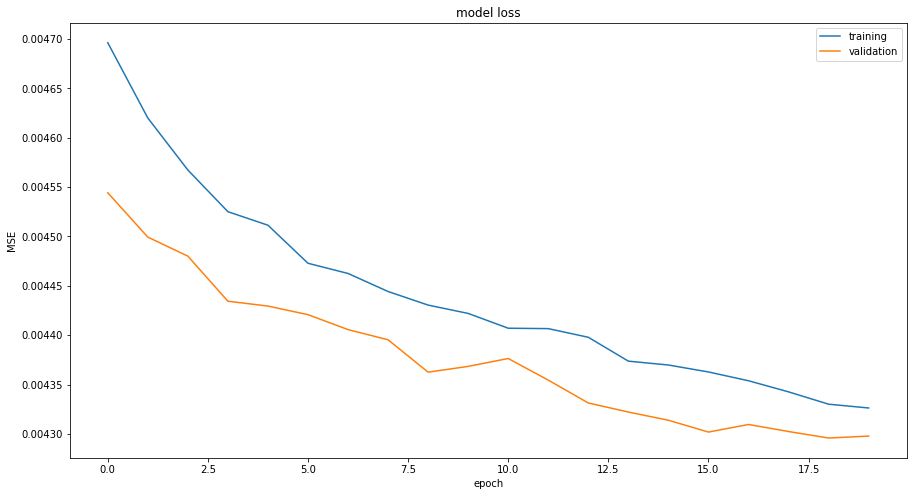

In [60]:
## TODO: Visualize the training and validation loss of your neural network
fig = plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

__Question X:__  Do you notice any evidence of overfitting or underfitting in the above plot?  If so, what steps have you taken to improve your model?  Note that slight overfitting or underfitting will not hurt your chances of a successful submission, as long as you have attempted some solutions towards improving your model (such as _regularization, dropout, increased/decreased number of layers, etc_).

__Answer:__

### Visualize a Subset of the Test Predictions

Execute the code cell below to visualize your model's predicted keypoints on a subset of the testing images.

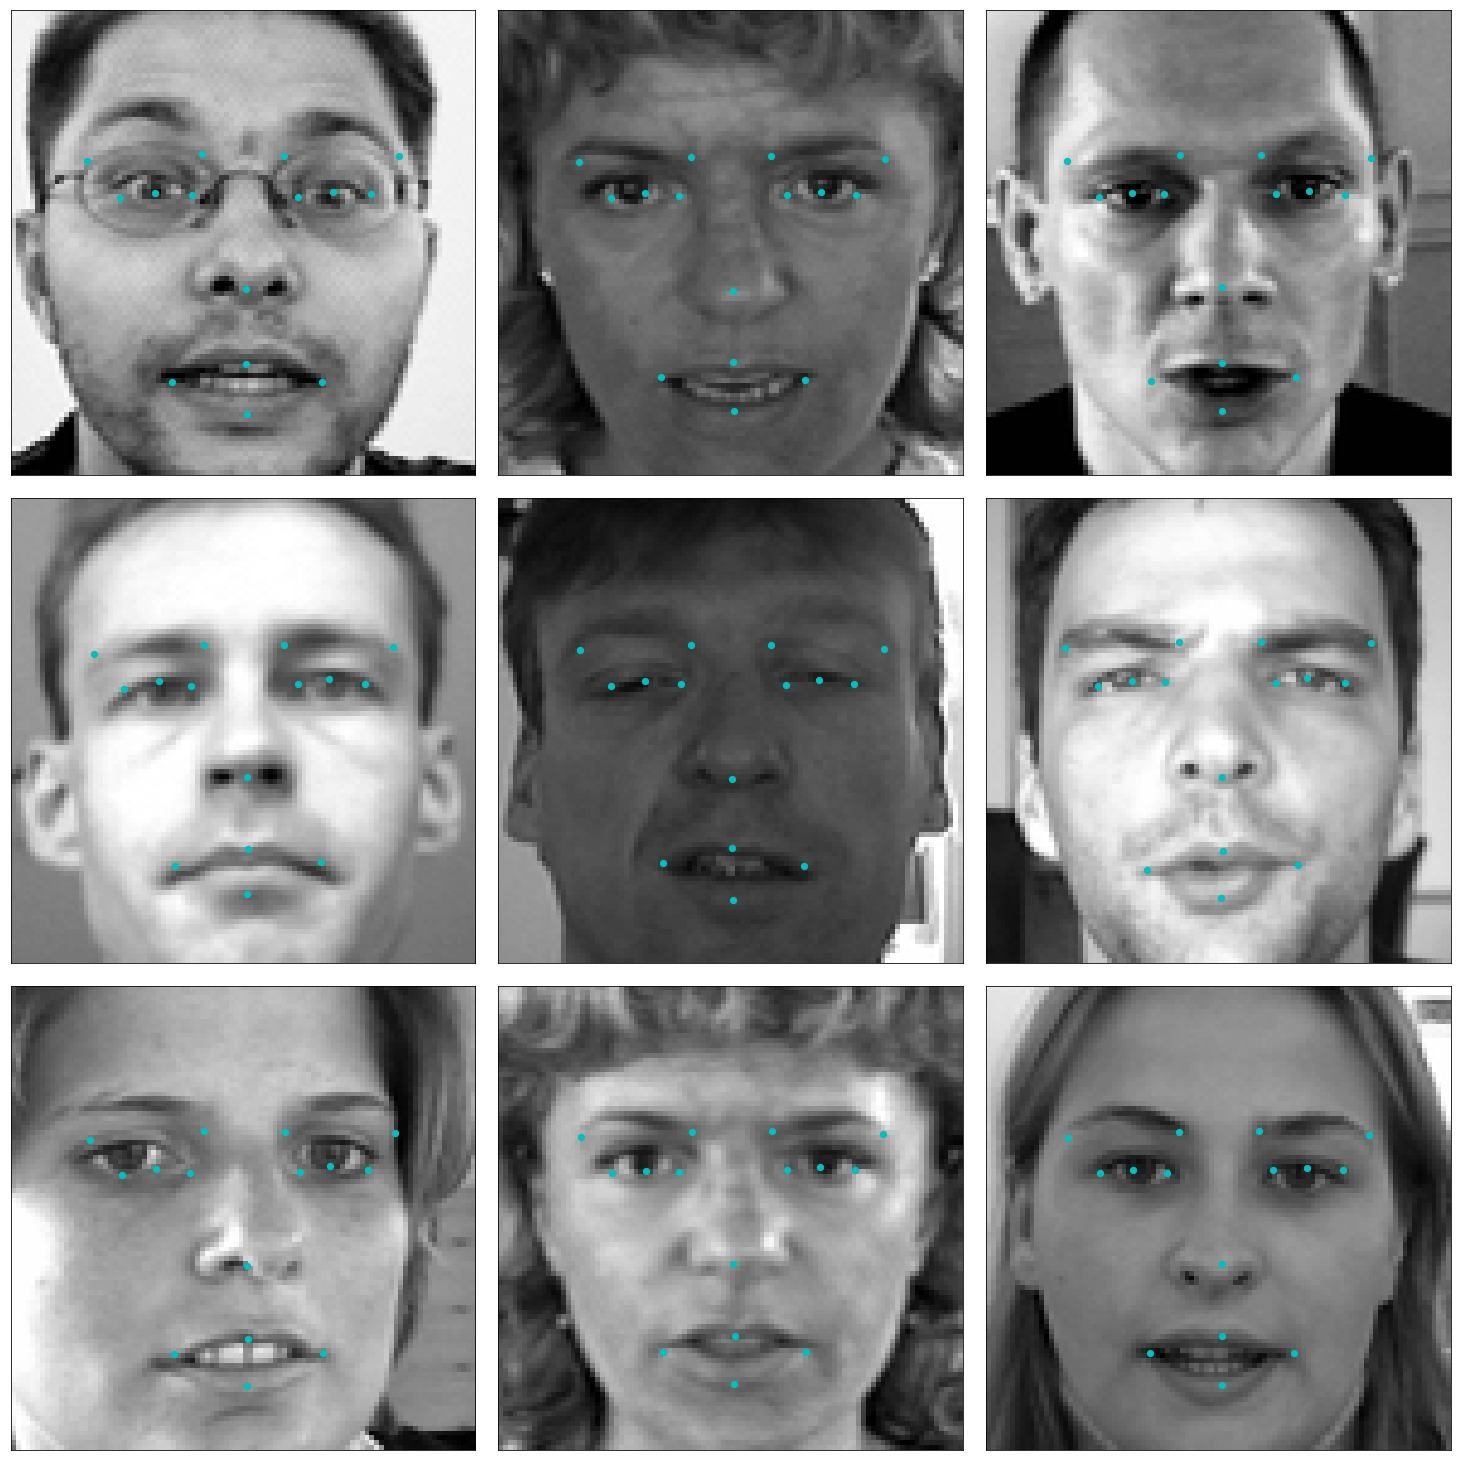

In [61]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

## 3.2  Time to complete the pipeline

With the work you did in Sections 1 and 2 of this notebook, along with your freshly trained facial keypoint detector, you can now complete the full pipeline.  That is given a color image containing a person or persons you can now 

- Detect the faces in this image automatically using OpenCV
- Predict the facial keypoints in each face detected in the image
- Paint predicted keypoints on each face detected

In this Subsection you will do just this!  

<a id='TODO_8'></a>

### TODO #8:  Facial Keypoints Detector: complete the pipeline

Use the OpenCV face detection functionality you built in previous Sections to expand the functionality of your keypoints detector to color images with arbitrary size.  Your function should perform the following steps

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

**Note**: step 4 can be the trickiest because remember your convolutional network is only trained to detect facial keypoints in $96 \times 96$ grayscale images where each pixel was normalized to lie in the interval $[0,1]$, and remember that each facial keypoints was normalized during training to the interval $[-1,1]$.  This means - practically speaking - to paint detected keypoints onto a test face you need to perform this same pre-processing to your candidate face  - that is after detecting it you should resize it to $96 \times 96$ and normalize its values before feeding it into your facial keypoint detector.  To be shown correctly on the original image the output keypoints from your detector then need to be shifted and re-normalized from the interval $[-1,1]$ to the width and height of your detected face.

When complete you should be able to produce example images like the one below

<img src="images/obamas_with_keypoints.png" width=1000 height=1000/>

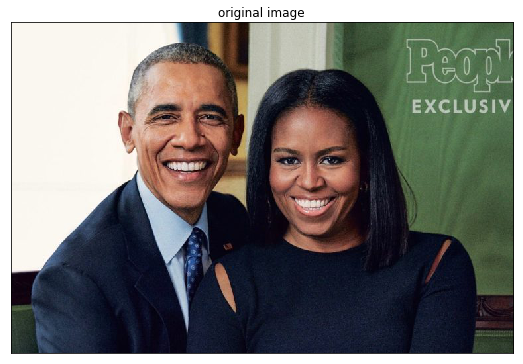

In [62]:
# load in color image for face detection
img = cv2.imread('images/obamas4.jpg')

# switch red and blue color channels --> by default OpenCV assumes BLUE comes first, not RED as in many images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

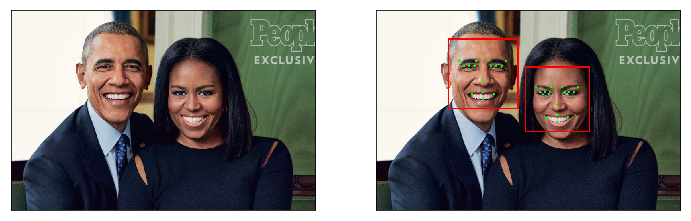

In [63]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector - the output here is an array of detections --> more specifically the corners of each detection box
faces = face_cascade.detectMultiScale(img, 1.2, 6)

# loop over our detections and draw their corresponding boxes on top of our original image
img_with_detections = img.copy()    # make a copy of the original image to plot rectangle detections ontop of

# grayscale image for saving
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# loop over the detected faces, mark the image where each face is found, as well as eyes in each face
for (x,y,w,h) in faces:
    # mark the image with detected face
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    
    # grab detected face
    roi = gray[y:y+h, x:x+w]

    ### make facial point prediction using trained network ###
    # resize face to proper dim
    temp_face = roi.copy()
    temp_face = cv2.resize(temp_face, (96,96), interpolation = cv2.INTER_AREA)

    # normalize values in temp_face
    temp_face = temp_face/255   

    # reshape for network eval
    temp_face.shape = (1,96,96,1)
    
    # make predictions with network 
    predictions = model.predict(temp_face)[0]

    ### draw predicted facial points on image ###
    width = round(w*0.5)
    height = round(h*0.5)
    s = x + width
    t = y + height
    
    # reformat predictions for plotting
    predictions.shape = (15,2)
    predictions[:,0] = [int(v* width + s) for v in predictions[:,0]]
    predictions[:,1] = [int(v*height + t) for v in predictions[:,1]]
        
    for k in range(15):
        # draw each point
        cv2.circle(img_with_detections,(predictions[k,0],predictions[k,1]), 3, (0,255,0), -1)
        
# plot out our image with detected faces drawn on top of them in red
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img)

ax1 = fig.add_subplot(122)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img_with_detections)

# 3.4  (Optinal) Further Directions - add a filter using facial keypoints to your laptop camera

Now you can add facial keypoint detection to your laptop camera - as illustrated in the gif below.

<img src="images/facial_keypoint_test.gif" width=400 height=300/>

The next Python cell contains the basic laptop video camera function used in the previous optional video exercises.  Combine it with the functionality you developed for keypoint detection and marking in the previous exercise and you should be good to go!

In [ ]:
import cv2
import time 
from keras.models import load_model

def laptop_camera_go():
    # import required cascades
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # keep video stream open
    while rval:
        # resize image from camera --> if things are running slow for you try making the image smaller by dividing width and height by a number greater than 2
        height, width = frame.shape[:2]
        frame = cv2.resize(frame, (round(width/2), round(height/2)), interpolation = cv2.INTER_AREA)

        ### face detection code goes here ###
        # get grayscale version of image for processing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # process frame to show face and eyes
        faces = face_cascade.detectMultiScale(gray, 3, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

             ### make facial point prediction using trained network ###
            # resize face to proper dim
            temp_face = roi_gray.copy()
            temp_face = cv2.resize(temp_face, (96,96), interpolation = cv2.INTER_AREA)

            # normalize values in temp_face
            temp_face = temp_face/255   

            # reshape for network eval
            temp_face.shape = (1,96,96,1)

            # make predictions with network 
            predictions = model.predict(temp_face)[0]

            ### draw predicted facial points on image ###
            width = round(w*0.5)
            height = round(h*0.5)
            s = x + width
            t = y + height

            # reformat predictions for plotting
            predictions.shape = (15,2)
            predictions[:,0] = predictions[:,0]* width + s
            predictions[:,1] = predictions[:,1]* height + t
            for k in range(15):
                cv2.circle(frame,(predictions[k,0],predictions[k,1]), 5, (0,255,0), -1)

        # plot image from camera with detections marked
        cv2.imshow("face detection activated", frame)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # destroy window 
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [ ]:
# load facial landmark detector model
model = load_model('my_model.h5')

# run your keypoint face painter
laptop_camera_go()

# 3.5  (Optinal) Further Directions - add a filter using facial keypoints

Using your freshly minted facial keypoint detector pipeline you can now do things like add fun filters to a person's face automatically.  In this optional exercise you can play around with adding sunglasses automatically to each individual's face in an image as shown in a demonstration image below.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

To produce this effect an image of a pair of sunglasses shown in the Python cell below.

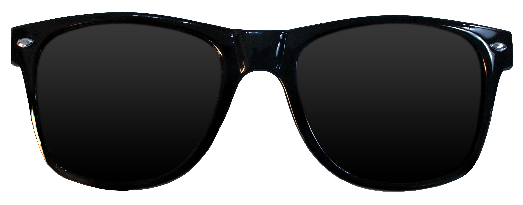

In [37]:
# load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent
# each pixel in the image is
sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(sunglasses)
ax1.axis('off');

This image is placed over each individual's face using the detected eye points to determine the location of the sunglasses, and eyebrow points to determine the size that the sunglasses should be for each person (one could also use the nose point to determine this).  

Notice that this image actually has *4 channels*, not just 3. 

In [38]:
# print out the shape of the sunglasses image
print ('the sunglasses image has shape ' + str(np.shape(sunglasses)))

the sunglasses image has shape (1123, 3064, 4)


It has the usual red, blue, and green channels any color image has, with the 4th channel representing the transparency level of each pixel in the image.  Here's how the transparency channel works: the lower the value, the more transparent the pixel will become.  The lower bound (completely transparent) is zero here, so any pixels set to 0 will not be seen. 

This is how we can place this image of sunglasses on someone's face and still see the area around of their face where the sunglasses lie - because these pixels in the sunglasses image have been made completely transparent.

Lets check out the alpha channel of our sunglasses image in the next Python cell.  Note because many of the pixels near the boundary are transparent we'll need to explicitly print out non-zero values if we want to see them. 

In [49]:
# print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# just to double check that there are indeed non-zero values
# lets find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

the alpha channel here looks like
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]

 the non-zero values of the alpha channel look like
(array([  17,   17,   17, ..., 1109, 1109, 1109]), array([ 687,  688,  689, ..., 2376, 2377, 2378]))


So in short what this means, when we place this sunglasses image on top of another we can use the transparency channel as a filter - to tell us which pixels (only the non-transparent ones with values greater than zero) to overlay on a new image.

One last thing - in doing this its helpful to understand which keypoint belongs to the eyes, mouth, etc., so in the image below we also print the index of each facial keypoint directly on the image so you can tell which keypoints are for the eyes, eyebrows, etc.,

<img src="images/obamas_points_numbered.png" width=500 height=500/>

All right - with that you're on your way!  See if you can't place sunglasses automatically on the individuals in the image loaded in / shown in the next Python cell.

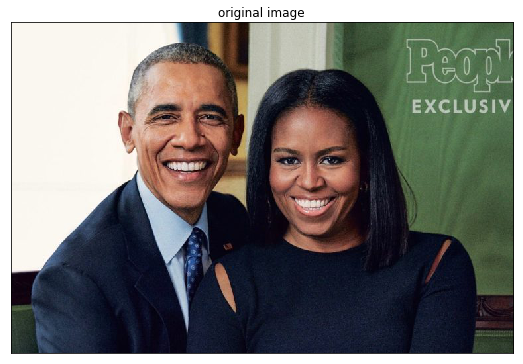

In [64]:
# load in color image for face detection
img = cv2.imread('images/obamas4.jpg')

# switch red and blue color channels --> by default OpenCV assumes BLUE comes first, not RED as in many images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

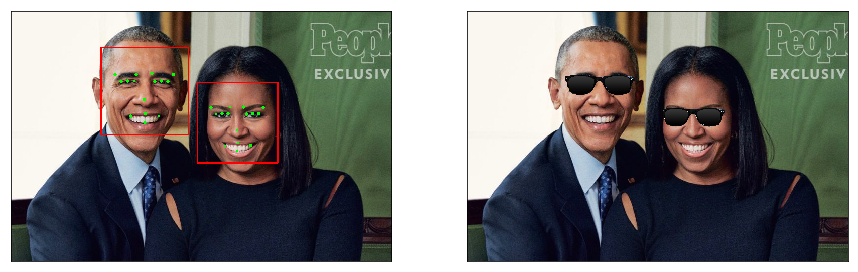

In [65]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector - the output here is an array of detections --> more specifically the corners of each detection box
faces = face_cascade.detectMultiScale(img, 1.2, 6)

# loop over our detections and draw their corresponding boxes on top of our original image
img_with_detections = img.copy()    # make a copy of the original image to plot rectangle detections ontop of

# grayscale image for saving
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# loop over the detected faces, mark the image where each face is found, as well as eyes in each face
for (x,y,w,h) in faces:
    # mark the image with detected face
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    
    # grab detected face
    roi = gray[y:y+h, x:x+w]

    ### make facial point prediction using trained network ###
    # resize face to proper dim
    temp_face = roi.copy()
    temp_face = cv2.resize(temp_face, (96,96), interpolation = cv2.INTER_AREA)

    # normalize values in temp_face
    temp_face = temp_face/255   

    # reshape for network eval
    temp_face.shape = (1,96,96,1)
    
    # make predictions with network 
    predictions = model.predict(temp_face)[0]

    ### draw predicted facial points on image ###
    width = round(w*0.5)
    height = round(h*0.5)
    s = x + width
    t = y + height
    
    # reformat predictions for plotting
    predictions.shape = (15,2)
    predictions[:,0] = [int(v* width + s) for v in predictions[:,0]]
    predictions[:,1] = [int(v*height + t) for v in predictions[:,1]]
        
    for k in range(15):
        # number each point - optional
        # cv2.putText(img_with_detections,str(k),(predictions[k,0],predictions[k,1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(0,0,255),1,cv2.LINE_AA)
        
        # draw each point on image
        cv2.circle(img_with_detections,(predictions[k,0],predictions[k,1]), 3, (0,255,0), -1)
          
    # draw glasses on that face!
    x,y = predictions[9,:] 
    h = predictions[5,1] - predictions[9,1]
    w = predictions[7,0] - predictions[9,0]
    h = np.float32(round(3*h))
    
    x = int(x)  - int(round(0.1*w))
    y = int(y)
    h = int(h)
    w = int(w)  + int(round(0.2*w))

    face_mask = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)
    face_mask =  cv2.resize(face_mask, (w, h), interpolation = cv2.INTER_CUBIC)
    roi_color = img[y:y+h,x:x+w]
    ind = np.argwhere(face_mask[:,:,3] > 0)
    for i in range(3):
        roi_color[ind[:,0],ind[:,1],i] = face_mask[ind[:,0],ind[:,1],i]    
    img[y:y+h,x:x+w] = roi_color
    
# plot out our image with detected faces drawn on top of them in red
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img_with_detections)

ax1 = fig.add_subplot(122)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img)

# 3.6  (Optinal) Further Directions - add a filter using facial keypoints to your laptop camera 

Now you can add the sunglasses filter to your laptop camera - as illustrated in the gif below.

<img src="images/mr_sunglasses.gif" width=250 height=250/>

The next Python cell contains the basic laptop video camera function used in the previous optional video exercises.  Combine it with the functionality you developed for adding sunglasses to someone's face in the previous optional exercise and you should be good to go!

In [1]:
import cv2
import time 
from keras.models import load_model
import numpy as np

def laptop_camera_go():
    # import required cascades
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

    # create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # keep video stream open
    while rval:
        # resize image from camera --> if things are running slow for you try making the image smaller by dividing width and height by a number greater than 2
        height, width = frame.shape[:2]
        frame = cv2.resize(frame, (round(width/2), round(height/2)), interpolation = cv2.INTER_AREA)

        ### face detection code goes here ###
        # get grayscale version of image for processing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # process frame to show face and eyes
        faces = face_cascade.detectMultiScale(gray, 3, 5)
        for (x,y,w,h) in faces:
             # mark the image with detected face
            #cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

            # grab detected face
            roi = gray[y:y+h, x:x+w]

            ### make facial point prediction using trained network ###
            # resize face to proper dim
            temp_face = roi.copy()
            temp_face = cv2.resize(temp_face, (96,96), interpolation = cv2.INTER_AREA)

            # normalize values in temp_face
            temp_face = temp_face/255   

            # reshape for network eval
            temp_face.shape = (1,96,96,1)

            # make predictions with network 
            predictions = model.predict(temp_face)[0]

            ### draw predicted facial points on image ###
            width = round(w*0.5)
            height = round(h*0.5)
            s = x + width
            t = y + height

            # reformat predictions for plotting
            predictions.shape = (15,2)
            predictions[:,0] = [int(v* width + s) for v in predictions[:,0]]
            predictions[:,1] = [int(v*height + t) for v in predictions[:,1]]

            # draw glasses on that face!
            x,y = predictions[9,:] 
            h = predictions[5,1] - predictions[9,1]
            w = predictions[7,0] - predictions[9,0]
            h = np.float32(round(3*h))

            x = int(x)  - int(round(0.1*w))
            y = int(y)
            h = int(h)
            w = int(w)  + int(round(0.2*w))

            face_mask = sunglasses.copy()
            face_mask =  cv2.resize(face_mask, (w, h), interpolation = cv2.INTER_CUBIC)
            roi_color = frame[y:y+h,x:x+w]
            ind = np.argwhere(face_mask[:,:,3] > 0)
            for i in range(3):
                roi_color[ind[:,0],ind[:,1],i] = face_mask[ind[:,0],ind[:,1],i]    
            frame[y:y+h,x:x+w] = roi_color

        # plot image from camera with detections marked
        cv2.imshow("face detection activated", frame)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # destroy window 
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

Using TensorFlow backend.


In [2]:
# load facial landmark detector model
model = load_model('my_model.h5')

# run sunglasses painter
laptop_camera_go()